In [1]:
def getResult(labelList, clusterNumber):
    d = {word: key for key, word in enumerate(set(labelList))}
    labelList_id = [d[word] for word in labelList]
    a = np.array(labelList_id).reshape(-1, 1)
    
    #decimal place
    dp = 6
    
    homo = round(metrics.homogeneity_score(labelList_id, clusterNumber),dp)
    silh = round(metrics.silhouette_score(a, clusterNumber, metric='euclidean'),dp)
    cali = round(metrics.calinski_harabasz_score(a, clusterNumber),dp)
    dav = round(metrics.davies_bouldin_score(a, clusterNumber),dp)
    
    print("Homogeneity score is " + str(homo))
    print("Silhouette score is " + str(silh))
    print("Calinski harabasz score is " + str(cali))
    print("Davies bouldin score is " + str(dav)) 

# Create a dendrogram with Agglomerative Clustering

['n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'Mirai', 'Mirai', 'Mirai', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'Mirai', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'Pony', 'n/a', 'NanoCore', 'Mirai', 'Mirai', 'RaccoonStealer', 'njrat', 'njrat', 'n/a', 'AsyncRAT', 'n/a', 'n/a', 'n/a', 'Mirai', 'n/a', 'Mirai', 'Mirai', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'Mirai', 'n/a', 'Mirai', 'Mirai', 'n/a', 'Mirai', 'n/a', 'n/a', 'n/a', 'IcedID']
[0 0 0 0 0 4 0 0 0 0 0 0 0 0 3 0 0 4 1 0 0 8 4 0 0 0 0 7 7 7 7 0 0 0 0 0 0
 7 0 0 0 0 0 0 0 0 0 0 0 0 7 7 7 7 7 7 7 0 3 0 0 7 0 7 0 0 0 0 7 0 0 7 7 6
 7 7 0 0 6 6 4 4 4 4 4 4 4 4 4 7 7 7 7 7 0 7 7 7 7 8]


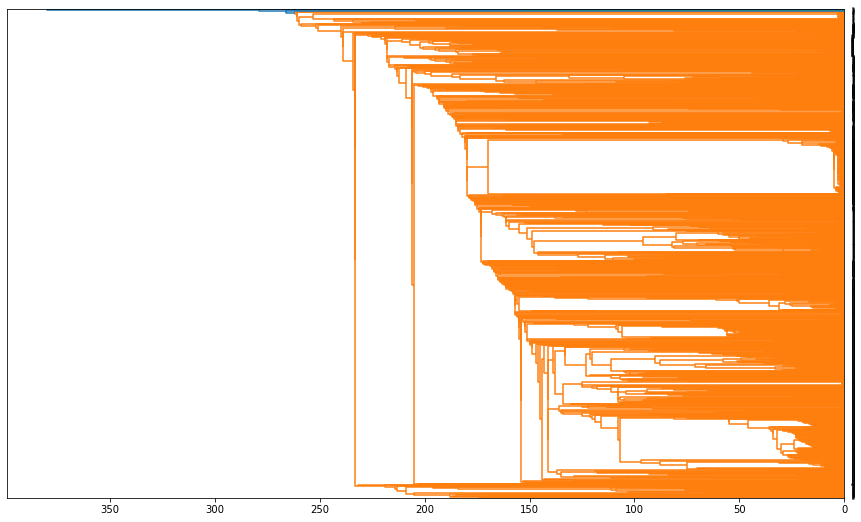

Code ran in 4.9869 seconds


In [2]:
from pylib.tlsh_lib import *
import time
start = time.perf_counter()

(tlist, labelList) = tlsh_csvfile("dataDirFull/mb_full_1K.csv")

clusterNumber = assignCluster(tlist, n_clusters=9)

print(labelList[:100])
print(clusterNumber[:100])

tlsh_dendrogram(tlist, labelList=clusterNumber)

end = time.perf_counter()      
print(f"Code ran in {end - start:0.4f} seconds")

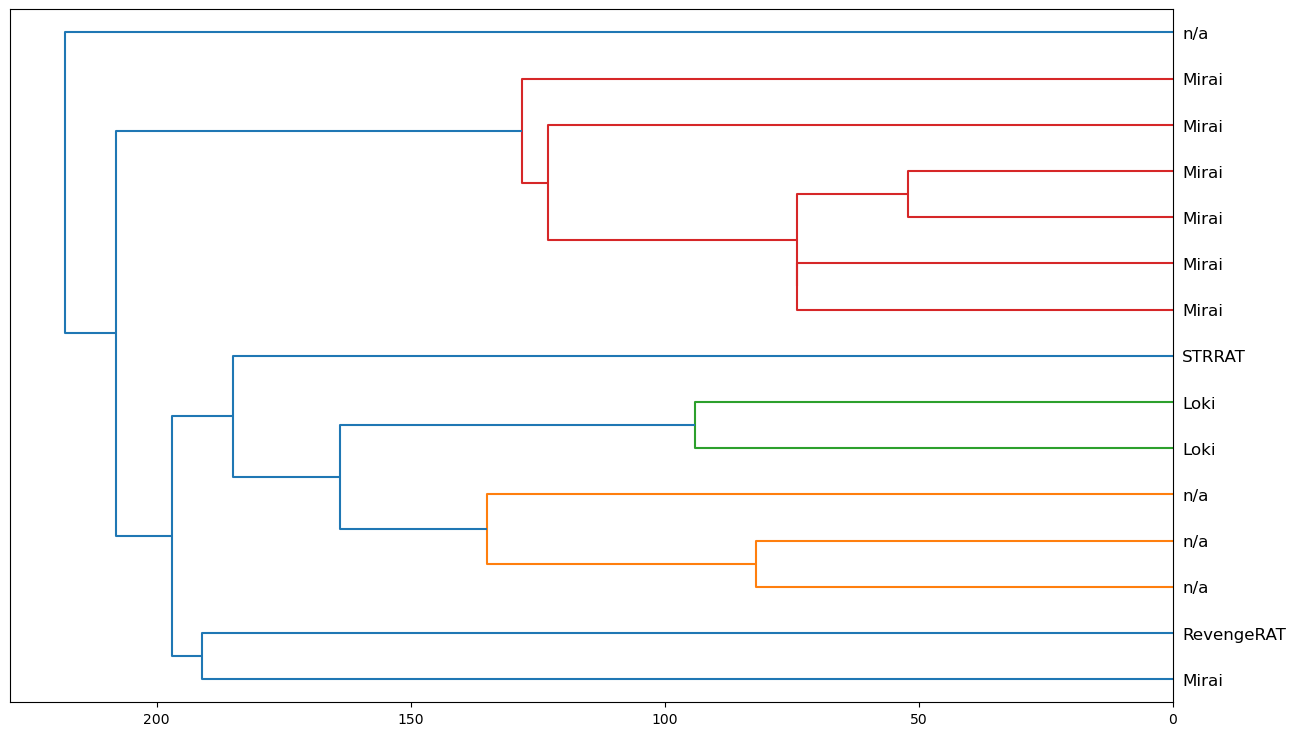

In [90]:
from pylib.tlsh_lib import *

(tlist, labelList) = tlsh_csvfile("dataDirFull/mb_full_1K.csv")

clusterNumber = assignCluster(tlist, n_clusters=71) # number of cluster  <--------------

(t3, l3) = selectCluster(tlist, clusterNumber, clusterIdx=3, labelList=labelList) # which cluster to show  <--------------

tlsh_dendrogram(t3, labelList=l3) #t3,l3 are just the variable for the selected t and l for clusterIdx "choose"

# Working with DBSCAN 

In [1]:
from pylib.tlsh_lib import *

(tlist, labelList) = tlsh_csvfile("dataDirFull/mb_full_1K.csv")

[ 0 -1 -1 -1  1 -1  2 -1  1 -1  0  3  4  2 -1  3 -1 -1 -1 -1 -1 -1  5 -1
 -1 -1 -1  6  7  8 -1  4  3 -1  3 -1  2 -1 -1 -1 -1 -1 -1  0 -1  9  9 -1
 10 -1 11 11 -1 -1 -1 -1 -1 12 -1 -1 12 -1 -1 13 14 14 -1  0 -1 -1 15 -1
 -1 -1 -1 -1 16 10 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1  0 -1 -1 17 -1 -1 16 16 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 10 -1 -1 18 18
 18 18 -1 18 -1 -1 -1 -1 19 19  0 -1 -1  0 -1 -1 -1 -1 -1 20 -1 -1 -1 -1
 -1 -1  0 -1 -1 -1 -1 21 22 22 19 -1 -1 19 -1 -1 -1 -1 -1 -1 -1 -1  0  0
 -1  3 -1 -1  0 -1 -1 -1  0  0 -1 -1 23  0 -1  0 24 24 19  0 -1  0  0  0
 -1 -1 -1 -1 25 25 25 25 25 25 25 25 26 25 25 26 25 25 25 25 25 25 25 26
 26 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
 25 25 25 25 26 25 25 26 -1 25 25 25 25 25 25 25 25 26 25 25 25 25 25 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 27 -1  3 -1 19 28 19  3 -1 19 29 -1 -1 19
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 17 -1 30 -1 -1 -1 -1

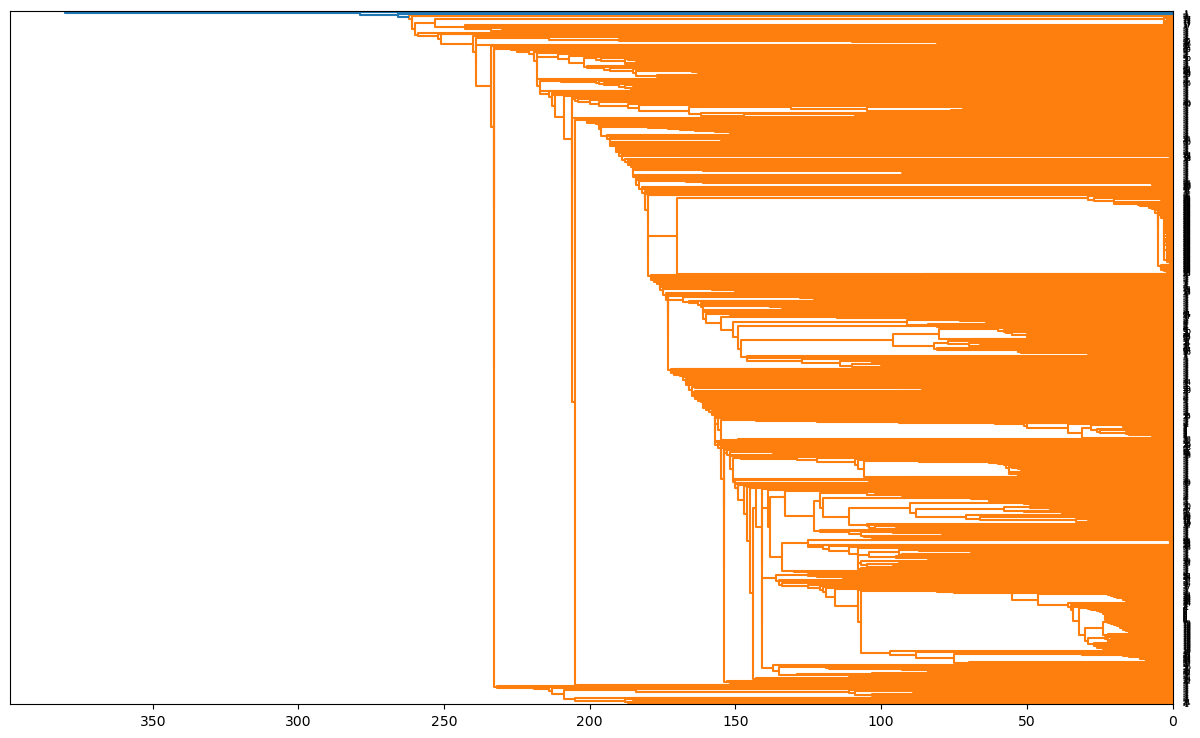

In [2]:
res = runDBSCAN(tlist, eps=30, min_samples=2)
print(res.labels_[:500])
tlsh_dendrogram(tlist, labelList=res.labels_)

nclusters= 71


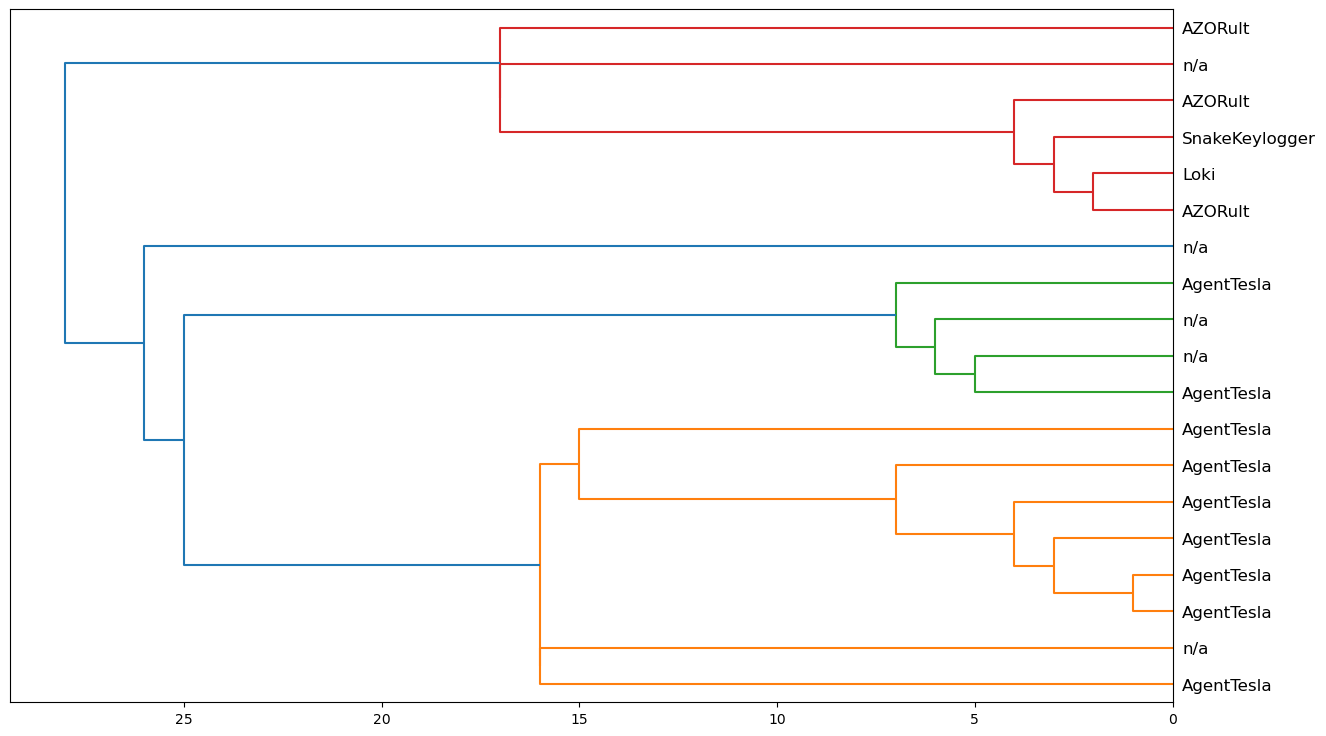

In [4]:
res = runDBSCAN(tlist, eps=30, min_samples=2)

clusterNumber = res.labels_ 
nclusters = max(res.labels_)
print("nclusters=", nclusters)

(t3, l3) = selectCluster(tlist, clusterNumber, clusterIdx=3, labelList=labelList) # which cluster to show  <--------------

tlsh_dendrogram(t3, labelList=l3)

In [52]:
from pylib.tlsh_lib import *
import time

# read in mitipule file 
for size in range(1,5):
    datafile = "dataDirFull/mb_full_" + str(size) + "K.csv"
    print("reading in " + datafile)
    (tlist, labelList) = tlsh_csvfile(datafile)
    if (tlist is not None):
        resetDistCalc()
        tic = time.perf_counter()
        res = runDBSCAN(tlist, eps=30, min_samples=2, algorithm='auto')
        toc = time.perf_counter()
        nDistCalc = lookupDistCalc()
        
        outfile = "dataDirFull/output/mb_full_" + str(size) + "K_dbscan_out.txt"
        outputClusters(outfile, tlist, res.labels_, labelList)
        
        print(f"DBSCAN ran in {toc - tic:0.4f} seconds")
        nclusters = max(res.labels_)
        print("nclusters=", nclusters)
        print("nDistCalc=", nDistCalc)
        # print(res.labels_)
        print()
    # end if
# end for


reading in dataDirFull/mb_full_1K.csv
written  dataDirFull/output/mb_full_1K_dbscan_out.txt
DBSCAN ran in 1.0130 seconds
nclusters= 71
nDistCalc= 961443

reading in dataDirFull/mb_full_2K.csv
written  dataDirFull/output/mb_full_2K_dbscan_out.txt
DBSCAN ran in 3.7245 seconds
nclusters= 151
nDistCalc= 3651191

reading in dataDirFull/mb_full_3K.csv
written  dataDirFull/output/mb_full_3K_dbscan_out.txt
DBSCAN ran in 8.9222 seconds
nclusters= 251
nDistCalc= 8692690

reading in dataDirFull/mb_full_4K.csv
written  dataDirFull/output/mb_full_4K_dbscan_out.txt
DBSCAN ran in 16.5029 seconds
nclusters= 337
nDistCalc= 15139235



# Running a Continue List of File

			DBSCAN
size	time	nclust	ndist
1K	1.0179	71	961443
2K	3.8615	151	3651191
3K	9.2693	251	8692690


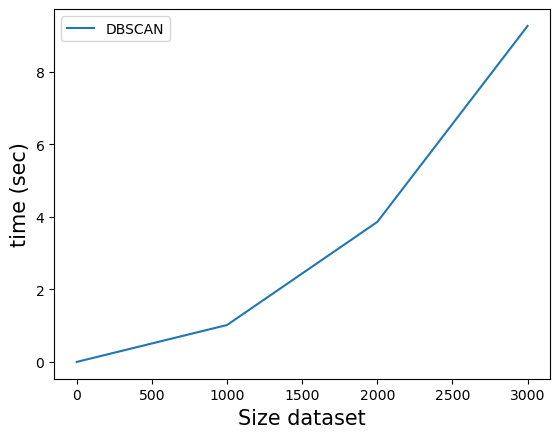

In [71]:
from pylib.tlsh_lib import *
import time

# (tlist, labelList) = tlsh_csvfile("dataDir/mb_10K.csv")

print("\t\t\tDBSCAN")
print("size\ttime\tnclust\tndist")

largeK = 4
dbs_time = [0] * (largeK)

for size in range(1, largeK):
    datafile = "dataDirFull/mb_full_" + str(size) + "K.csv"
    (tlist, labelList) = tlsh_csvfile(datafile)
    if (tlist is not None):        
        resetDistCalc()
        tic = time.perf_counter()
        dbs_res = runDBSCAN(tlist, eps=30, min_samples=2, algorithm='auto')
        toc = time.perf_counter()
        dbs_nDistCalc = lookupDistCalc()
        dbs_time[size] = toc-tic
        dtime          = f"{dbs_time[size]:0.4f}"
        dbs_nclusters = max(dbs_res.labels_)
        
        print( str(size) + "K\t" + dtime + "\t" + str(dbs_nclusters) + "\t" + str(dbs_nDistCalc)  )
    # end if
# end for

srange = [x for x in range(0, largeK*1000, 1000)]

import matplotlib.pyplot as plt
line2, = plt.plot(srange, dbs_time,  label='DBSCAN')
#print(srange)
#print(dbs_time)
plt.legend(handles=[line2], loc='upper left')
plt.xlabel('Size dataset', fontsize=15)
plt.ylabel('time (sec)', fontsize=15)
plt.show()

# Running a List of Files

			DBSCAN
size	time	nclust	ndist
1K	1.0000	71	961443
2K	3.7484	151	3651191
3K	8.7645	251	8692690
4K	15.5322	337	15139235
5K	24.7256	414	23723595
10K	102.2712	733	97132001


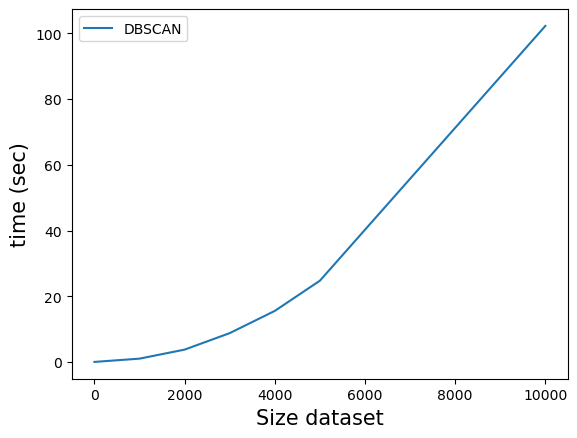

In [1]:
from pylib.tlsh_lib import *
import time

# (tlist, labelList) = tlsh_csvfile("dataDir/mb_10K.csv")

print("\t\t\tDBSCAN")
print("size\ttime\tnclust\tndist")

#largeK = 6     
#dbs_time = [0] * (largeK) 

fileRange = [1,2,3,4,5,10] # list of file run <-----------------
dbs_time = [0] * (len(fileRange) + 1) 

#for size in range(1, largeK): 
for size in fileRange:
    datafile = "dataDirFull/mb_full_" + str(size) + "K.csv"
    (tlist, labelList) = tlsh_csvfile(datafile)
    
    if (tlist is not None):        
        resetDistCalc()
        tic = time.perf_counter()
        dbs_res = runDBSCAN(tlist, eps=30, min_samples=2, algorithm='auto')
        toc = time.perf_counter()
        dbs_nDistCalc = lookupDistCalc()
        dbs_time[fileRange.index(size) + 1] = toc-tic
        #print (fileRange.index(size))
       # print(dbs_time)
        dtime          = f"{dbs_time[fileRange.index(size) +1]:0.4f}"
        dbs_nclusters = max(dbs_res.labels_)
        
        print( str(size) + "K\t" + dtime + "\t" + str(dbs_nclusters) + "\t" + str(dbs_nDistCalc)  )
    # end if
# end for

#srange = [ x for x in range(0, len(fileRange)*1000 +1, 1000) ]
srange = [0]

for x in range(0, int(max(fileRange)+1)):
    if x  in fileRange:
        srange.append(x*1000)

#print(srange)
#print(dbs_time)

import matplotlib.pyplot as plt
line2, = plt.plot(srange, dbs_time,  label='DBSCAN')
plt.legend(handles=[line2], loc='upper left')
plt.xlabel('Size dataset', fontsize=15)
plt.ylabel('time (sec)', fontsize=15)
plt.show()

# Compare HAC with DBSCAN

		HAC-T		|		DBSCAN
size	time	nclust	ndist	|	time	nclust	ndist
1K	0.6976	85	227245	|	2.6797	71	961443
2K	2.0137	184	658792	|	9.9467	151	3651191
3K	3.2869	295	1330207	|	24.8260	251	8692690
4K	3.9855	399	2111721	|	43.9972	337	15139235
5K	7.3457	492	3369580	|	71.8406	414	23723595


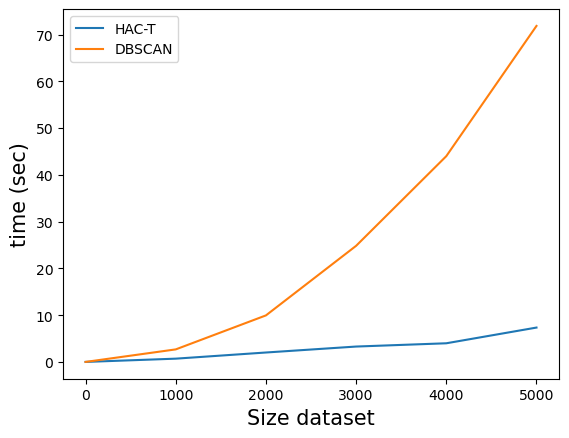

In [1]:
from pylib.tlsh_lib import *
from pylib.hac_lib  import *
import time

# (tlist, labelList) = tlsh_csvfile("dataDir/mb_10K.csv")

print("\t\tHAC-T\t\t|\t\tDBSCAN")
print("size\ttime\tnclust\tndist\t|\ttime\tnclust\tndist")

largeK = 6
hac_time = [0] * (largeK)
dbs_time = [0] * (largeK)

for size in range(1, largeK):
    datafile = "dataDirFull/mb_full_" + str(size) + "K.csv"
    (tlist, labelList) = tlsh_csvfile(datafile)
    if (tlist is not None):
        hac_resetDistCalc()
        tic = time.perf_counter()
        hac_res = HAC_T(datafile, CDist=30, step3=0, outfname="tmp.txt")
        toc = time.perf_counter()
        hac_nDistCalc = hac_lookupDistCalc()
        hac_time[size] = toc-tic
        htime          = f"{hac_time[size]:0.4f}"
        hac_nclusters = max(hac_res)
        
        outfile = "dataDirFull/mb_full_" + str(size) + "K_hac-t_out.txt"
        outputClusters(outfile, tlist, hac_res, labelList, quiet=True)
        
        resetDistCalc()
        tic = time.perf_counter()
        dbs_res = runDBSCAN(tlist, eps=30, min_samples=2, algorithm='auto')
        toc = time.perf_counter()
        dbs_nDistCalc = lookupDistCalc()
        dbs_time[size] = toc-tic
        dtime          = f"{dbs_time[size]:0.4f}"
        dbs_nclusters = max(dbs_res.labels_)
        
        outfile = "dataDirFull/mb_full_" + str(size) + "K_dbscan_out.txt"
        outputClusters(outfile, tlist, dbs_res.labels_, labelList, quiet=True)
        
        print( str(size) + "K\t" +
                htime + "\t" + str(hac_nclusters) + "\t" + str(hac_nDistCalc) + "\t|\t"
              + dtime + "\t" + str(dbs_nclusters) + "\t" + str(dbs_nDistCalc)  )
    # end if
# end for

srange = [x for x in range(0, largeK*1000, 1000)]

import matplotlib.pyplot as plt
line1, = plt.plot(srange, hac_time,  label='HAC-T')
line2, = plt.plot(srange, dbs_time,  label='DBSCAN')
plt.legend(handles=[line1, line2], loc='upper left')
plt.xlabel('Size dataset', fontsize=15)
plt.ylabel('time (sec)', fontsize=15)
plt.show()

In [7]:
from sklearn import metrics
from pylib.tlsh_lib import *
import numpy as np

(tlist, labelList) = tlsh_csvfile("mb_full_1K_noNull.csv")

for number in range(30, 150, 10):
    clusterNumber = assignCluster(tlist, number)
    
    print(number)
    print("The homogeneity score is" )
    print(metrics.homogeneity_score(labelList_id, clusterNumber)) #homogeneity_score(labels_true, labels_pred)

30
The homogeneity score is
0.48181228237917145
40
The homogeneity score is
0.5057359591792903
50
The homogeneity score is
0.5445887602863692
60
The homogeneity score is
0.5787973628945025
70
The homogeneity score is
0.604112916045655
80
The homogeneity score is
0.6242561521691804
90
The homogeneity score is
0.6549618359070137
100
The homogeneity score is
0.6706392818418548
110
The homogeneity score is
0.6971492101240526
120
The homogeneity score is
0.7008421661540123
130
The homogeneity score is
0.7214687806381994
140
The homogeneity score is
0.7317293790728502


In [2]:
from sklearn.cluster import AffinityPropagation
import numpy as np
X = np.array([[2], [4], [0],[2], [4], [0]])
clustering = AffinityPropagation(random_state=3).fit(X)
clustering

AffinityPropagation(random_state=3)

In [3]:
X

array([[2],
       [4],
       [0],
       [2],
       [4],
       [0]])

In [28]:
clustering.labels_

array([0, 1, 2, 0, 1, 2], dtype=int64)

In [29]:
clustering.predict([[0], [4]])

array([2, 1], dtype=int64)

In [30]:
clustering.cluster_centers_

array([[2],
       [4],
       [0]])